In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy.stats.mstats import winsorize

In [242]:
df = pd.read_csv('ime692_project.csv')
df.head()

,State,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop,Test
0,California,Alameda,91.4,88.4,99.406,1770.559475,49.890444,1,33.258827,9,5.7,10.7,62.678,16.768796,90.4,0.017292,5.114553,11.031221,0
1,California,Butte,89.1,89.2,52.537,4775.484604,62.099507,1,36.520664,13,0.7,6.4,24.189,13.494706,92.8,0.017793,5.288203,1.897019,0
2,California,Colusa,86.5,71.3,59.401,5726.667504,19.219010,0,37.223305,14,18.7,-0.6,39.137,15.707145,94.6,0.018564,10.205597,1.308767,0
3,California,Contra Costa,93.8,89.5,99.716,2630.232438,52.702580,1,37.082206,9,4.9,6.2,44.922,17.678572,94.5,0.014044,5.817034,9.541527,1
4,California,Del Norte,84.0,80.1,45.283,5641.809291,35.769303,0,36.879187,15,21.5,-12.6,-57.687,23.012579,90.4,0.028765,4.631094,3.523659,0


In [243]:
df.shape

(756, 19)

In [244]:
df.describe()

,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop,Test
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,82.684392,86.930820,58.447962,5874.873493,44.852159,0.603175,39.993086,17.677249,6.761508,8.307672,21.002967,12.118775,92.914418,0.023596,9.469008,12.396693,0.297619
std,7.052813,5.305236,16.596879,1606.470548,16.124775,0.489563,1.878899,3.798440,7.880749,10.520125,16.108802,10.354706,4.961696,0.011829,2.656731,13.136235,0.457514
min,55.600000,61.800000,27.063000,1124.920105,0.040823,0.000000,31.156179,7.000000,-30.300000,-21.900000,-67.705000,-18.168016,23.000000,0.000000,2.234984,0.540638,0.000000
25%,78.775000,83.975000,48.006250,4808.005385,33.276618,0.000000,39.198748,15.000000,2.400000,2.100000,13.660250,4.921826,91.800000,0.016730,7.720216,3.102765,0.000000
50%,83.400000,87.900000,54.517000,6041.350921,45.830869,1.000000,40.176702,18.000000,6.200000,7.700000,21.828000,10.451356,93.700000,0.020966,9.527030,7.429402,0.000000
75%,87.600000,90.900000,64.080500,7155.022414,56.441026,1.000000,40.888016,20.000000,10.700000,14.000000,29.513500,17.756555,95.200000,0.026486,11.116103,16.912766,1.000000
max,97.000000,96.800000,142.299000,8932.443703,86.158768,1.000000,44.452995,27.000000,42.200000,72.300000,112.332000,53.842225,98.600000,0.098090,24.159065,76.973139,1.000000


In [245]:
df.skew()

IT_WholeRate           -0.799214
HighSchool_WholeRate   -0.930076
MedianInc_WholeAvg      1.438793
republican_rate        -0.515469
Segregation            -0.195883
urban                  -0.422615
racial_weighted_bias   -0.994222
hesitancy               0.286490
HighSchool_Disparity    0.648100
IT_Disparity            0.713006
MedianInc_Disparity    -0.458652
CvdVax_DisparityY       0.893981
vehicle                -7.355358
FacNumRate              2.174734
CaseRate                0.322468
Black_Prop              1.823162
Test                    0.887046
dtype: float64

In [246]:
df.kurt()

IT_WholeRate             0.879838
HighSchool_WholeRate     1.137861
MedianInc_WholeAvg       2.711940
republican_rate         -0.269811
Segregation             -0.390398
urban                   -1.826235
racial_weighted_bias     2.798889
hesitancy                0.238001
HighSchool_Disparity     3.480374
IT_Disparity             3.098516
MedianInc_Disparity      4.969021
CvdVax_DisparityY        1.124795
vehicle                 81.918856
FacNumRate               7.062752
CaseRate                 1.585935
Black_Prop               3.433576
Test                    -1.216375
dtype: float64

In [247]:
df.isnull().sum()

State                   0
County                  0
IT_WholeRate            0
HighSchool_WholeRate    0
MedianInc_WholeAvg      0
republican_rate         0
Segregation             0
urban                   0
racial_weighted_bias    0
hesitancy               0
HighSchool_Disparity    0
IT_Disparity            0
MedianInc_Disparity     0
CvdVax_DisparityY       0
vehicle                 0
FacNumRate              0
CaseRate                0
Black_Prop              0
Test                    0
dtype: int64

In [248]:
df.dtypes

State                    object
County                   object
IT_WholeRate            float64
HighSchool_WholeRate    float64
MedianInc_WholeAvg      float64
republican_rate         float64
Segregation             float64
urban                     int64
racial_weighted_bias    float64
hesitancy                 int64
HighSchool_Disparity    float64
IT_Disparity            float64
MedianInc_Disparity     float64
CvdVax_DisparityY       float64
vehicle                 float64
FacNumRate              float64
CaseRate                float64
Black_Prop              float64
Test                      int64
dtype: object

In [249]:
df.duplicated(subset = None, keep = 'first')

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Length: 756, dtype: bool

In [250]:
df_train = df[df['Test']==0]
df_train.head()

,State,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop,Test
0,California,Alameda,91.4,88.4,99.406,1770.559475,49.890444,1,33.258827,9,5.7,10.7,62.678,16.768796,90.4,0.017292,5.114553,11.031221,0
1,California,Butte,89.1,89.2,52.537,4775.484604,62.099507,1,36.520664,13,0.7,6.4,24.189,13.494706,92.8,0.017793,5.288203,1.897019,0
2,California,Colusa,86.5,71.3,59.401,5726.667504,19.219010,0,37.223305,14,18.7,-0.6,39.137,15.707145,94.6,0.018564,10.205597,1.308767,0
4,California,Del Norte,84.0,80.1,45.283,5641.809291,35.769303,0,36.879187,15,21.5,-12.6,-57.687,23.012579,90.4,0.028765,4.631094,3.523659,0
5,California,El Dorado,90.1,93.4,83.377,5324.527717,58.879477,1,36.525529,10,8.4,3.6,-4.821,7.449124,95.9,0.017112,5.069927,1.037113,0


In [251]:
df_train.drop(columns=['Test'],inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [252]:
cols = list(df_train.columns.values)
df_train=pd.concat([df_train[cols[0:13]],df_train[cols[14:]],df_train[cols[13]]],axis=1)
df_train

,State,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,vehicle,FacNumRate,CaseRate,Black_Prop,CvdVax_DisparityY
0,California,Alameda,91.4,88.4,99.406,1770.559475,49.890444,1,33.258827,9,5.7,10.7,62.678,90.4,0.017292,5.114553,11.031221,16.768796
1,California,Butte,89.1,89.2,52.537,4775.484604,62.099507,1,36.520664,13,0.7,6.4,24.189,92.8,0.017793,5.288203,1.897019,13.494706
2,California,Colusa,86.5,71.3,59.401,5726.667504,19.219010,0,37.223305,14,18.7,-0.6,39.137,94.6,0.018564,10.205597,1.308767,15.707145
4,California,Del Norte,84.0,80.1,45.283,5641.809291,35.769303,0,36.879187,15,21.5,-12.6,-57.687,90.4,0.028765,4.631094,3.523659,23.012579
5,California,El Dorado,90.1,93.4,83.377,5324.527717,58.879477,1,36.525529,10,8.4,3.6,-4.821,95.9,0.017112,5.069927,1.037113,7.449124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,Wisconsin,Douglas,83.3,93.7,53.986,4439.702475,73.099649,1,36.775647,17,15.1,-6.2,-0.735,92.7,0.041715,10.801854,1.253766,20.113383
752,Wisconsin,Dodge,87.6,90.8,60.652,6476.031146,65.224838,0,35.934490,17,12.3,0.2,26.775,94.9,0.013661,14.317103,3.345894,23.430382
753,Wisconsin,Dane,91.4,95.8,73.893,2293.396669,49.608129,1,35.577848,14,8.4,9.0,42.958,92.7,0.016645,8.236402,5.531969,26.019744
754,Wisconsin,Brown,89.8,92.1,62.340,5282.318703,58.983900,1,37.440183,17,12.5,6.1,40.201,94.5,0.018145,13.017971,2.976465,26.188287


In [253]:
num_features = ['IT_WholeRate', 'HighSchool_WholeRate', 'MedianInc_WholeAvg', 'republican_rate', 'Segregation','urban','racial_weighted_bias', 'hesitancy', 'HighSchool_Disparity','IT_Disparity', 'MedianInc_Disparity','vehicle','FacNumRate','CaseRate',	'Black_Prop']

In [254]:
mms = MinMaxScaler()
df_train[num_features]=mms.fit_transform(df_train[num_features])
df_train

,State,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,vehicle,FacNumRate,CaseRate,Black_Prop,CvdVax_DisparityY
0,California,Alameda,0.886139,0.760000,0.627781,0.082695,0.600414,1.0,0.120614,0.052632,0.496552,0.378630,0.895463,0.856392,0.176283,0.131343,0.135271,16.768796
1,California,Butte,0.829208,0.782857,0.221059,0.467570,0.747466,1.0,0.376856,0.263158,0.427586,0.328688,0.631123,0.898424,0.181395,0.139263,0.015490,13.494706
2,California,Colusa,0.764851,0.271429,0.280624,0.589399,0.230992,0.0,0.432053,0.315789,0.675862,0.247387,0.733785,0.929947,0.189255,0.363555,0.007776,15.707145
4,California,Del Norte,0.702970,0.522857,0.158110,0.578530,0.430332,0.0,0.405020,0.368421,0.714483,0.108014,0.068803,0.856392,0.293246,0.109291,0.036821,23.012579
5,California,El Dorado,0.853960,0.902857,0.488684,0.537892,0.708683,1.0,0.377238,0.105263,0.533793,0.296167,0.431884,0.952715,0.174456,0.129307,0.004214,7.449124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,Wisconsin,Douglas,0.685644,0.911429,0.233634,0.424563,0.879958,1.0,0.396887,0.473684,0.626207,0.182346,0.459946,0.896673,0.425272,0.390752,0.007055,20.113383
752,Wisconsin,Dodge,0.792079,0.828571,0.291480,0.685379,0.785109,0.0,0.330807,0.473684,0.587586,0.256678,0.648883,0.935201,0.139274,0.551089,0.034490,23.430382
753,Wisconsin,Dane,0.886139,0.971429,0.406383,0.149660,0.597014,1.0,0.302790,0.315789,0.533793,0.358885,0.760027,0.896673,0.169696,0.273736,0.063157,26.019744
754,Wisconsin,Brown,0.846535,0.865714,0.306128,0.532486,0.709940,1.0,0.449091,0.473684,0.590345,0.325203,0.741092,0.928196,0.184979,0.491833,0.029645,26.188287


In [255]:
df_train.shape

(531, 18)

In [256]:
corr_mat = df_train.corr()

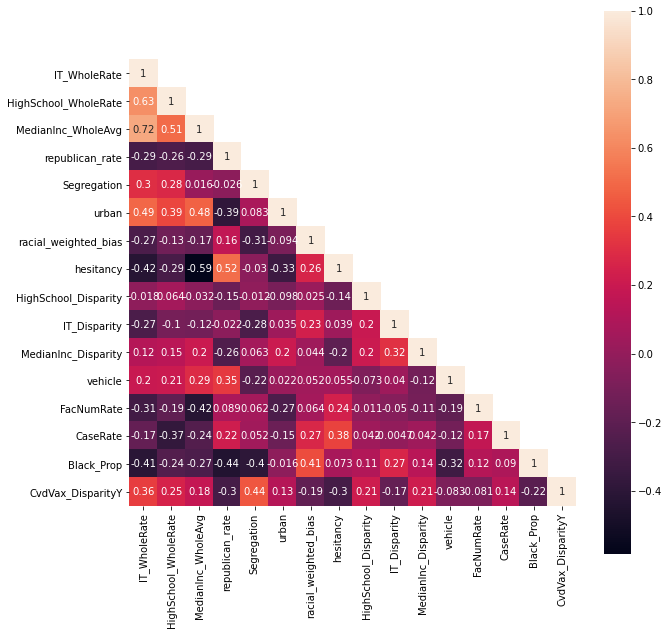

In [257]:
fig, ax = plt.subplots(figsize=(10,10))
mask= np.array(corr_mat)
mask[np.tril_indices_from(mask)]=False
sb.heatmap(corr_mat,mask=mask,vmax=1.0,square=True,annot=True)
plt.show()

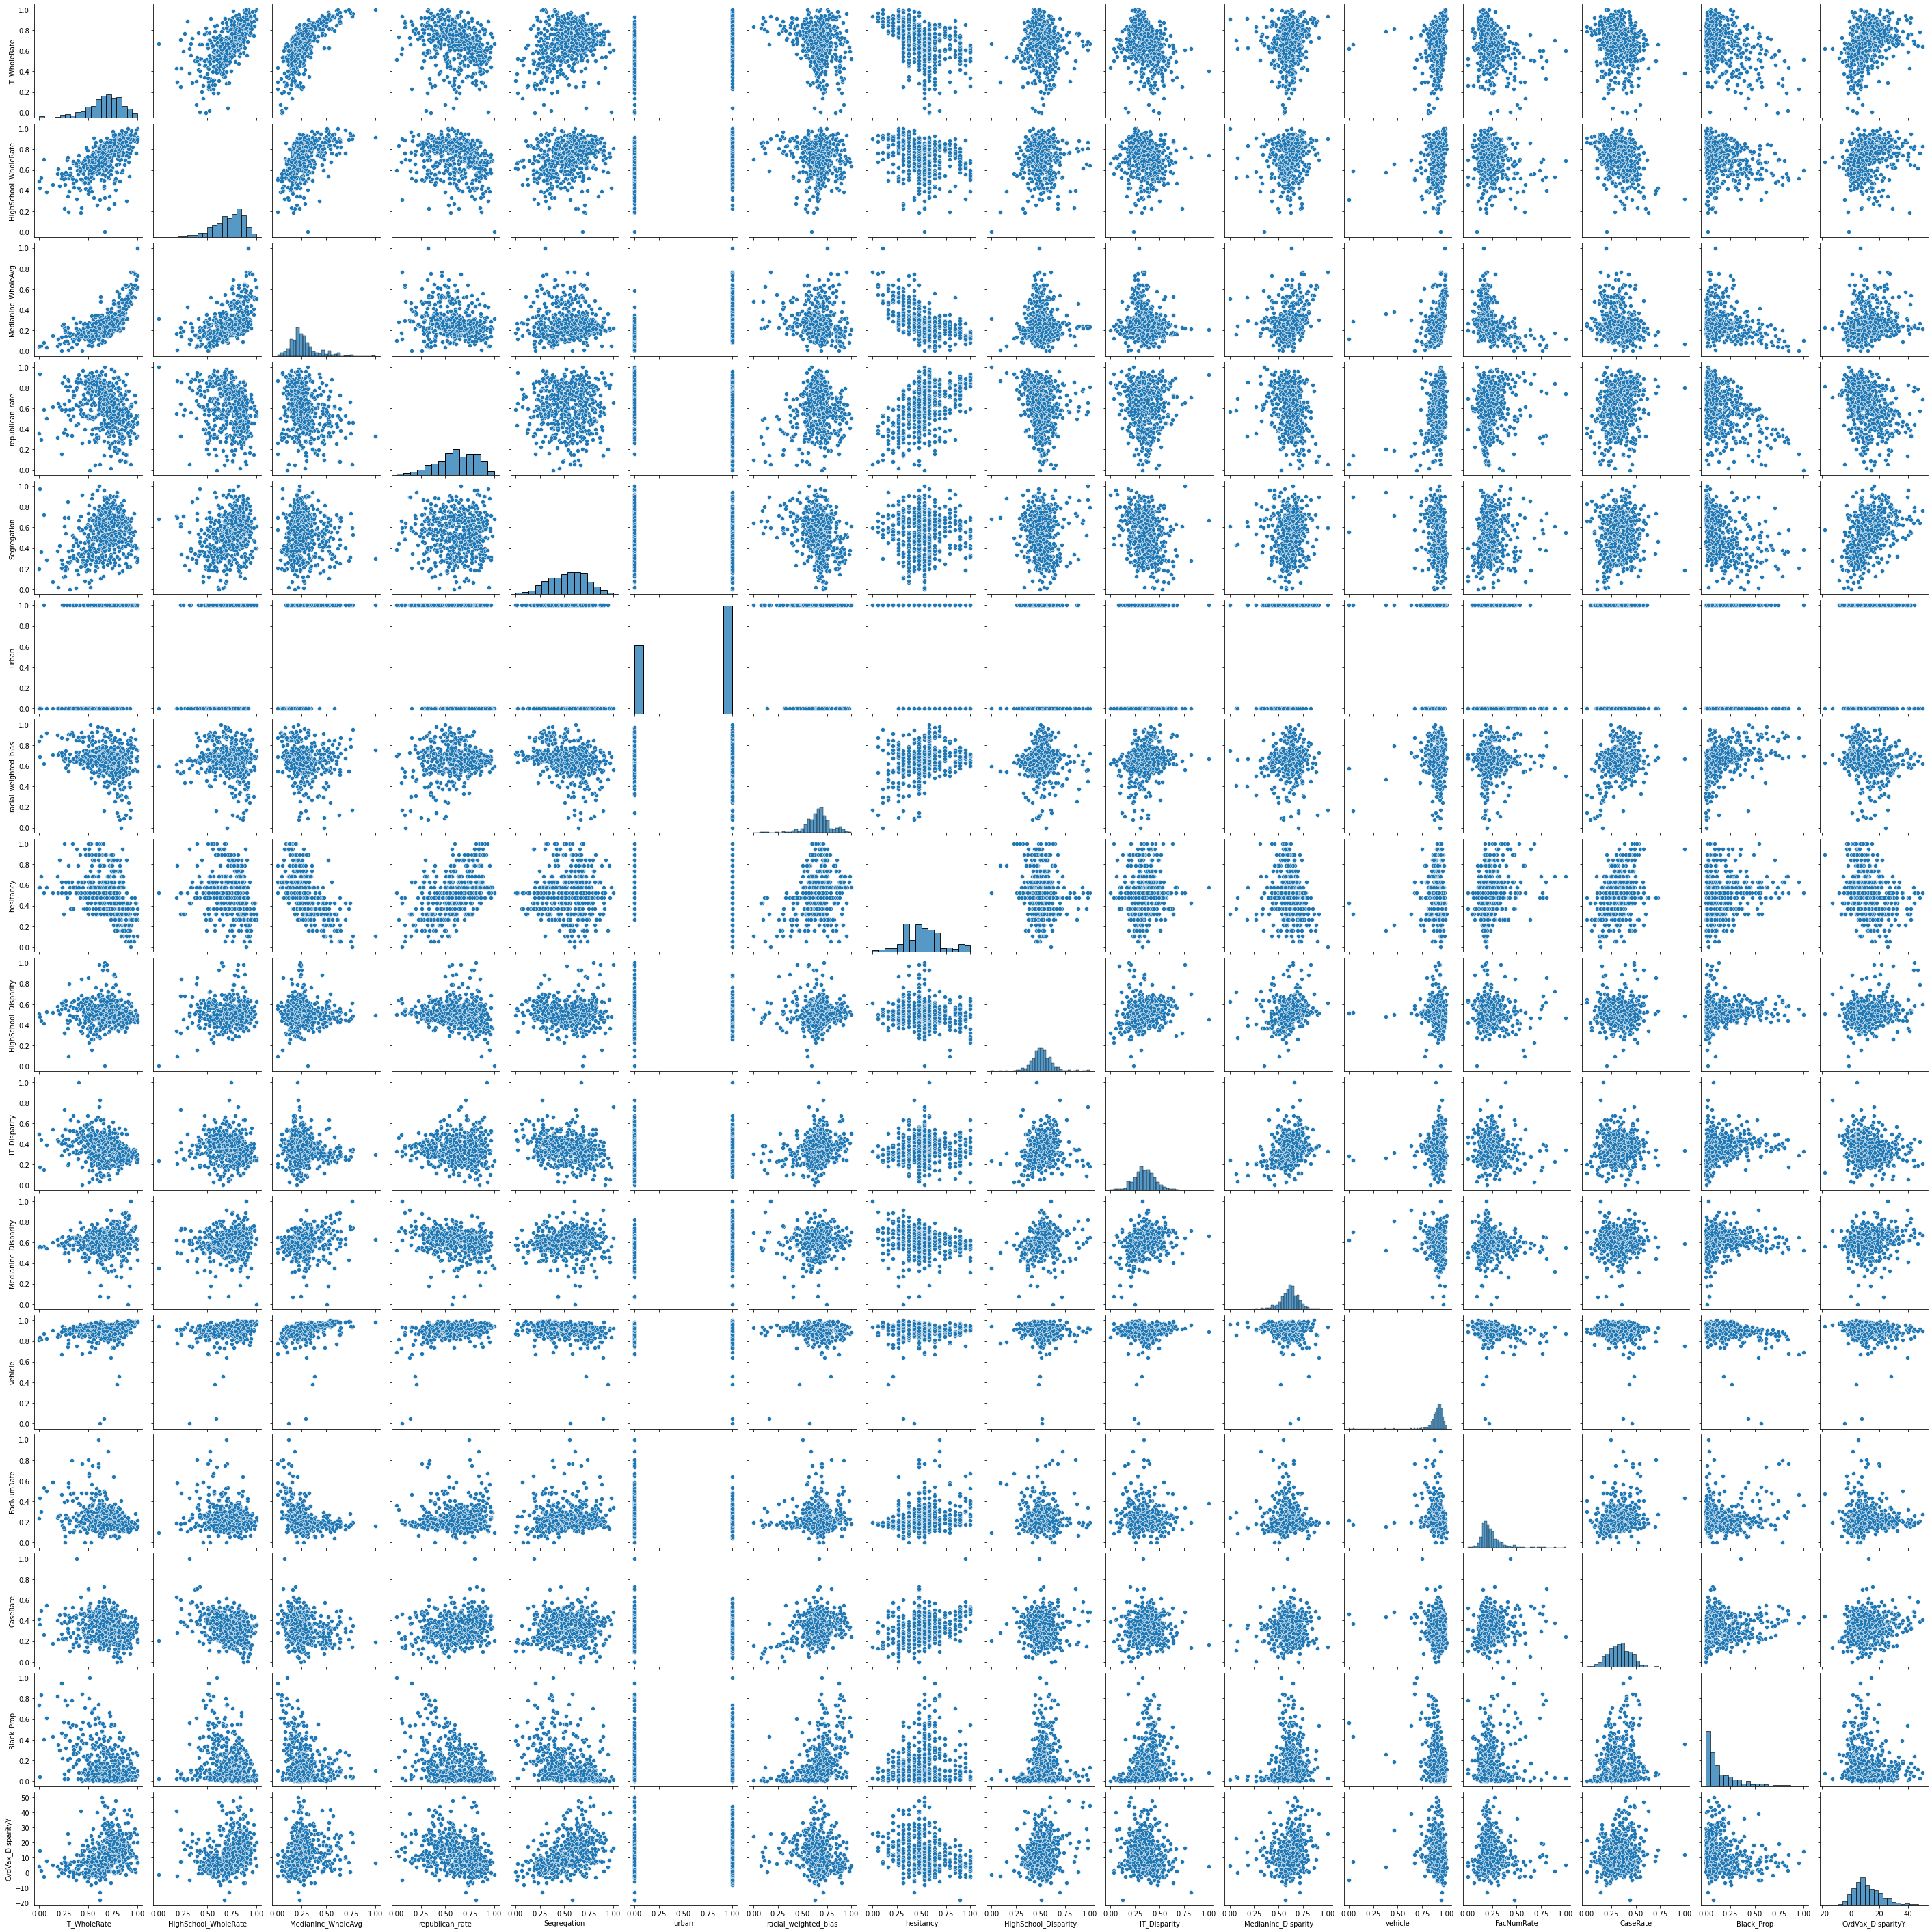

In [258]:
sb.pairplot(df_train)
plt.show()

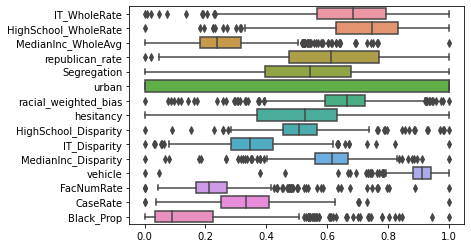

In [259]:
sb.boxplot(data=df_train[num_features], orient="h")
plt.show()

In [260]:
len(df_train.County.unique().tolist())

434

In [261]:
len(df_train.State.unique().tolist())

16

In [262]:
for feat in ['vehicle','FacNumRate']:
    df_train[feat]=winsorize(df_train[feat],(0.01,0.01))
df_train.kurt()

IT_WholeRate            0.947065
HighSchool_WholeRate    1.114399
MedianInc_WholeAvg      2.551586
republican_rate        -0.269731
Segregation            -0.432704
urban                  -1.786421
racial_weighted_bias    3.185954
hesitancy               0.196279
HighSchool_Disparity    3.944084
IT_Disparity            2.110684
MedianInc_Disparity     4.619912
vehicle                 4.188303
FacNumRate              6.101506
CaseRate                1.606711
Black_Prop              3.317826
CvdVax_DisparityY       0.885956
dtype: float64

In [263]:
df_train.skew()

IT_WholeRate           -0.818257
HighSchool_WholeRate   -0.943388
MedianInc_WholeAvg      1.340779
republican_rate        -0.469629
Segregation            -0.188852
urban                  -0.469385
racial_weighted_bias   -1.025666
hesitancy               0.353750
HighSchool_Disparity    0.645387
IT_Disparity            0.507657
MedianInc_Disparity    -1.073870
vehicle                -1.613498
FacNumRate              2.085101
CaseRate                0.367714
Black_Prop              1.812743
CvdVax_DisparityY       0.813489
dtype: float64

In [264]:
df_train=pd.get_dummies(data=df_train,columns=['State'],drop_first=True)
df_train

,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,...,State_North Carolina,State_Ohio,State_Oregon,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Virginia,State_West Virginia,State_Wisconsin
0,Alameda,0.886139,0.760000,0.627781,0.082695,0.600414,1.0,0.120614,0.052632,0.496552,...,0,0,0,0,0,0,0,0,0,0
1,Butte,0.829208,0.782857,0.221059,0.467570,0.747466,1.0,0.376856,0.263158,0.427586,...,0,0,0,0,0,0,0,0,0,0
2,Colusa,0.764851,0.271429,0.280624,0.589399,0.230992,0.0,0.432053,0.315789,0.675862,...,0,0,0,0,0,0,0,0,0,0
4,Del Norte,0.702970,0.522857,0.158110,0.578530,0.430332,0.0,0.405020,0.368421,0.714483,...,0,0,0,0,0,0,0,0,0,0
5,El Dorado,0.853960,0.902857,0.488684,0.537892,0.708683,1.0,0.377238,0.105263,0.533793,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,Douglas,0.685644,0.911429,0.233634,0.424563,0.879958,1.0,0.396887,0.473684,0.626207,...,0,0,0,0,0,0,0,0,0,1
752,Dodge,0.792079,0.828571,0.291480,0.685379,0.785109,0.0,0.330807,0.473684,0.587586,...,0,0,0,0,0,0,0,0,0,1
753,Dane,0.886139,0.971429,0.406383,0.149660,0.597014,1.0,0.302790,0.315789,0.533793,...,0,0,0,0,0,0,0,0,0,1
754,Brown,0.846535,0.865714,0.306128,0.532486,0.709940,1.0,0.449091,0.473684,0.590345,...,0,0,0,0,0,0,0,0,0,1


In [265]:
df_train.drop(columns=['County'],inplace=True)
df_train.head()

,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,...,State_North Carolina,State_Ohio,State_Oregon,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Virginia,State_West Virginia,State_Wisconsin
0,0.886139,0.760000,0.627781,0.082695,0.600414,1.0,0.120614,0.052632,0.496552,0.378630,...,0,0,0,0,0,0,0,0,0,0
1,0.829208,0.782857,0.221059,0.467570,0.747466,1.0,0.376856,0.263158,0.427586,0.328688,...,0,0,0,0,0,0,0,0,0,0
2,0.764851,0.271429,0.280624,0.589399,0.230992,0.0,0.432053,0.315789,0.675862,0.247387,...,0,0,0,0,0,0,0,0,0,0
4,0.702970,0.522857,0.158110,0.578530,0.430332,0.0,0.405020,0.368421,0.714483,0.108014,...,0,0,0,0,0,0,0,0,0,0
5,0.853960,0.902857,0.488684,0.537892,0.708683,1.0,0.377238,0.105263,0.533793,0.296167,...,0,0,0,0,0,0,0,0,0,0


In [266]:
df_test = df[df['Test']==1]
df_test.head()

,State,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,CvdVax_DisparityY,vehicle,FacNumRate,CaseRate,Black_Prop,Test
3,California,Contra Costa,93.8,89.5,99.716,2630.232438,52.702580,1,37.082206,9,4.9,6.2,44.922,17.678572,94.5,0.014044,5.817034,9.541527,1
6,California,Fresno,83.7,76.0,53.969,4508.222111,48.479737,1,38.059116,13,7.6,11.6,35.703,20.408602,91.5,0.020218,10.071154,5.802817,1
7,California,Humboldt,87.0,90.5,48.041,3162.956936,65.592092,0,35.935500,13,18.3,17.9,26.185,13.897327,92.4,0.037622,2.671181,1.488662,1
9,California,Kern,82.7,74.1,53.350,5388.924928,48.367835,1,38.407253,14,6.8,10.5,27.542,13.830598,93.2,0.019551,11.983866,6.252152,1
11,California,Lake,80.9,85.8,47.040,4556.597222,55.312216,0,37.932073,14,13.2,6.4,17.181,7.081481,93.1,0.012425,5.300842,2.098282,1


In [267]:
df_test.drop(columns=['Test'],inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [268]:
cols = list(df_test.columns.values)
df_test=pd.concat([df_test[cols[0:13]],df_test[cols[14:]],df_test[cols[13]]],axis=1)
df_test

,State,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,vehicle,FacNumRate,CaseRate,Black_Prop,CvdVax_DisparityY
3,California,Contra Costa,93.8,89.5,99.716,2630.232438,52.702580,1,37.082206,9,4.9,6.2,44.922,94.5,0.014044,5.817034,9.541527,17.678572
6,California,Fresno,83.7,76.0,53.969,4508.222111,48.479737,1,38.059116,13,7.6,11.6,35.703,91.5,0.020218,10.071154,5.802817,20.408602
7,California,Humboldt,87.0,90.5,48.041,3162.956936,65.592092,0,35.935500,13,18.3,17.9,26.185,92.4,0.037622,2.671181,1.488662,13.897327
9,California,Kern,82.7,74.1,53.350,5388.924928,48.367835,1,38.407253,14,6.8,10.5,27.542,93.2,0.019551,11.983866,6.252152,13.830598
11,California,Lake,80.9,85.8,47.040,4556.597222,55.312216,0,37.932073,14,13.2,6.4,17.181,93.1,0.012425,5.300842,2.098282,7.081481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,Wisconsin,Marathon,87.1,91.8,62.633,5825.207232,65.729477,1,38.444135,16,5.3,1.5,17.809,95.1,0.012528,11.643280,0.908676,17.403687
745,Wisconsin,La Crosse,89.6,95.0,57.882,4239.244491,71.742863,1,40.653087,17,4.6,5.3,27.742,94.2,0.013557,11.285758,1.615035,21.997792
746,Wisconsin,Kenosha,89.0,90.1,63.733,5083.362534,51.375610,1,40.979044,17,10.3,12.3,34.732,93.4,0.018283,10.560801,7.413261,15.758710
747,Wisconsin,Jefferson,88.1,91.8,66.291,5685.033118,60.280219,0,39.096538,17,-2.1,-2.5,16.514,96.2,0.015336,11.071264,1.154903,16.559907


In [269]:
mms = MinMaxScaler()
df_test[num_features]=mms.fit_transform(df_test[num_features])
df_test

,State,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,MedianInc_Disparity,vehicle,FacNumRate,CaseRate,Black_Prop,CvdVax_DisparityY
3,California,Contra Costa,0.914439,0.794118,0.724752,0.187427,0.585388,1.0,0.445939,0.10,0.297521,0.260626,0.536733,0.952064,0.192111,0.180076,0.161932,17.678572
6,California,Fresno,0.644385,0.297794,0.223388,0.438062,0.533056,1.0,0.519453,0.30,0.353306,0.321029,0.473376,0.912117,0.276572,0.394730,0.094670,20.408602
7,California,Humboldt,0.732620,0.830882,0.158420,0.258524,0.745124,0.0,0.359649,0.30,0.574380,0.391499,0.407965,0.924101,0.514648,0.021342,0.017056,13.897327
9,California,Kern,0.617647,0.227941,0.216604,0.555600,0.531669,1.0,0.545650,0.35,0.336777,0.308725,0.417291,0.934754,0.267447,0.491242,0.102754,13.830598
11,California,Lake,0.569519,0.658088,0.147449,0.444518,0.617729,0.0,0.509893,0.35,0.469008,0.262864,0.346086,0.933422,0.169967,0.154029,0.028023,7.081481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,Wisconsin,Marathon,0.735294,0.878676,0.318341,0.613825,0.746826,1.0,0.548426,0.45,0.305785,0.208054,0.350402,0.960053,0.171380,0.474057,0.006621,17.403687
745,Wisconsin,La Crosse,0.802139,0.996324,0.266272,0.402164,0.821348,1.0,0.714652,0.50,0.291322,0.250559,0.418665,0.948069,0.185458,0.456017,0.019329,21.997792
746,Wisconsin,Kenosha,0.786096,0.816176,0.330396,0.514819,0.568944,1.0,0.739180,0.50,0.409091,0.328859,0.466703,0.937417,0.250093,0.419437,0.123643,15.758710
747,Wisconsin,Jefferson,0.762032,0.878676,0.358431,0.595118,0.679296,0.0,0.597520,0.50,0.152893,0.163311,0.341502,0.974700,0.209784,0.445194,0.011051,16.559907


In [270]:
df_test=pd.get_dummies(data=df_test,columns=['State'],drop_first=True)
df_test

,County,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,...,State_North Carolina,State_Ohio,State_Oregon,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Virginia,State_West Virginia,State_Wisconsin
3,Contra Costa,0.914439,0.794118,0.724752,0.187427,0.585388,1.0,0.445939,0.10,0.297521,...,0,0,0,0,0,0,0,0,0,0
6,Fresno,0.644385,0.297794,0.223388,0.438062,0.533056,1.0,0.519453,0.30,0.353306,...,0,0,0,0,0,0,0,0,0,0
7,Humboldt,0.732620,0.830882,0.158420,0.258524,0.745124,0.0,0.359649,0.30,0.574380,...,0,0,0,0,0,0,0,0,0,0
9,Kern,0.617647,0.227941,0.216604,0.555600,0.531669,1.0,0.545650,0.35,0.336777,...,0,0,0,0,0,0,0,0,0,0
11,Lake,0.569519,0.658088,0.147449,0.444518,0.617729,0.0,0.509893,0.35,0.469008,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,Marathon,0.735294,0.878676,0.318341,0.613825,0.746826,1.0,0.548426,0.45,0.305785,...,0,0,0,0,0,0,0,0,0,1
745,La Crosse,0.802139,0.996324,0.266272,0.402164,0.821348,1.0,0.714652,0.50,0.291322,...,0,0,0,0,0,0,0,0,0,1
746,Kenosha,0.786096,0.816176,0.330396,0.514819,0.568944,1.0,0.739180,0.50,0.409091,...,0,0,0,0,0,0,0,0,0,1
747,Jefferson,0.762032,0.878676,0.358431,0.595118,0.679296,0.0,0.597520,0.50,0.152893,...,0,0,0,0,0,0,0,0,0,1


In [271]:
df_test.drop(columns=['County'],inplace=True)
df_test.head()

,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,...,State_North Carolina,State_Ohio,State_Oregon,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Virginia,State_West Virginia,State_Wisconsin
3,0.914439,0.794118,0.724752,0.187427,0.585388,1.0,0.445939,0.10,0.297521,0.260626,...,0,0,0,0,0,0,0,0,0,0
6,0.644385,0.297794,0.223388,0.438062,0.533056,1.0,0.519453,0.30,0.353306,0.321029,...,0,0,0,0,0,0,0,0,0,0
7,0.732620,0.830882,0.158420,0.258524,0.745124,0.0,0.359649,0.30,0.574380,0.391499,...,0,0,0,0,0,0,0,0,0,0
9,0.617647,0.227941,0.216604,0.555600,0.531669,1.0,0.545650,0.35,0.336777,0.308725,...,0,0,0,0,0,0,0,0,0,0
11,0.569519,0.658088,0.147449,0.444518,0.617729,0.0,0.509893,0.35,0.469008,0.262864,...,0,0,0,0,0,0,0,0,0,0


In [272]:
df_test = df_test.reset_index()

In [273]:
df_test.drop(columns=['index'],inplace=True)
df_test

,IT_WholeRate,HighSchool_WholeRate,MedianInc_WholeAvg,republican_rate,Segregation,urban,racial_weighted_bias,hesitancy,HighSchool_Disparity,IT_Disparity,...,State_North Carolina,State_Ohio,State_Oregon,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Virginia,State_West Virginia,State_Wisconsin
0,0.914439,0.794118,0.724752,0.187427,0.585388,1.0,0.445939,0.10,0.297521,0.260626,...,0,0,0,0,0,0,0,0,0,0
1,0.644385,0.297794,0.223388,0.438062,0.533056,1.0,0.519453,0.30,0.353306,0.321029,...,0,0,0,0,0,0,0,0,0,0
2,0.732620,0.830882,0.158420,0.258524,0.745124,0.0,0.359649,0.30,0.574380,0.391499,...,0,0,0,0,0,0,0,0,0,0
3,0.617647,0.227941,0.216604,0.555600,0.531669,1.0,0.545650,0.35,0.336777,0.308725,...,0,0,0,0,0,0,0,0,0,0
4,0.569519,0.658088,0.147449,0.444518,0.617729,0.0,0.509893,0.35,0.469008,0.262864,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.735294,0.878676,0.318341,0.613825,0.746826,1.0,0.548426,0.45,0.305785,0.208054,...,0,0,0,0,0,0,0,0,0,1
221,0.802139,0.996324,0.266272,0.402164,0.821348,1.0,0.714652,0.50,0.291322,0.250559,...,0,0,0,0,0,0,0,0,0,1
222,0.786096,0.816176,0.330396,0.514819,0.568944,1.0,0.739180,0.50,0.409091,0.328859,...,0,0,0,0,0,0,0,0,0,1
223,0.762032,0.878676,0.358431,0.595118,0.679296,0.0,0.597520,0.50,0.152893,0.163311,...,0,0,0,0,0,0,0,0,0,1


In [274]:
df_train = sm.add_constant(df_train)

In [275]:
mod = sm.OLS(df_train['CvdVax_DisparityY'], df_train.loc[:, df_train.columns != 'CvdVax_DisparityY'])
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:      CvdVax_DisparityY   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     36.42
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          5.56e-106
Time:                        04:16:47   Log-Likelihood:                -1686.7
No. Observations:                 531   AIC:                             3435.
Df Residuals:                     500   BIC:                             3568.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.9139 

In [321]:
ypred = res.predict(df_test)

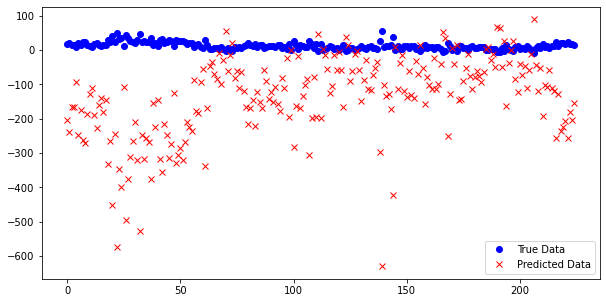

In [322]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_test['CvdVax_DisparityY'], "o", label="True Data",color='b')
ax.plot(ypred, "x", label="Predicted Data",color='r')
ax.legend(loc="best")
plt.show()

In [313]:
len(ypred)

225

In [325]:
RMSE = 0
for item in df_test['CvdVax_DisparityY']-ypred:
    RMSE+=item**2
print((RMSE**0.5)/225)

13.072281700987684


In [360]:
mod2 = sm.OLS(df_train['CvdVax_DisparityY'], df_train.loc[:, df_train.columns != 'CvdVax_DisparityY'])
res2 = mod2.fit_regularized(alpha=0,L1_wt=1)
print(res2.params)

const                   10.181279
IT_WholeRate             6.355606
HighSchool_WholeRate    -2.943458
MedianInc_WholeAvg      -7.937560
republican_rate        -16.754131
Segregation             11.619785
urban                   -0.192610
racial_weighted_bias     3.904213
hesitancy               -3.110311
HighSchool_Disparity    13.761334
IT_Disparity            -3.009486
MedianInc_Disparity      2.201054
vehicle                 -4.073363
FacNumRate              -4.283139
CaseRate                 7.885658
Black_Prop             -10.695029
State_Illinois          18.267225
State_Indiana           11.991520
State_Maine             -2.815761
State_New Jersey        10.072053
State_New York           2.044533
State_North Carolina    -5.175220
State_Ohio               0.498167
State_Oregon            -5.756733
State_Pennsylvania       0.527144
State_South Carolina    -1.629573
State_Tennessee         -1.117373
State_Texas              1.807404
State_Virginia          -2.232881
State_West Vir

In [361]:
ypred = res2.predict(df_test)

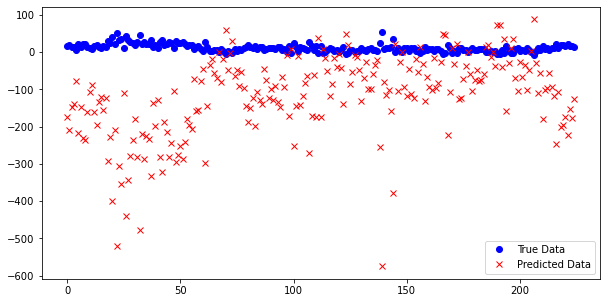

In [362]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_test['CvdVax_DisparityY'], "o", label="True Data",color='b')
ax.plot(ypred, "x", label="Predicted Data",color='r')
ax.legend(loc="best")
plt.show()

In [363]:
RMSE = 0
for item in df_test['CvdVax_DisparityY']-ypred:
    RMSE+=item**2
print((RMSE**0.5)/225)

11.668028901893727


In [364]:
mod2 = sm.OLS(df_train['CvdVax_DisparityY'], df_train.loc[:, df_train.columns != 'CvdVax_DisparityY'])
res2 = mod2.fit_regularized(alpha=1,L1_wt=0)
print(res2.params)

[ 1.82279421  1.69875462  1.57823249  0.65037402  0.54642211  1.71627022
  1.31643151  0.93560637  0.41293383  1.17094322  0.44219005  1.30207695
  1.54905151  0.3730053   0.78445597 -0.0355573   1.19903228  0.60918763
  0.02834735  0.34732832  0.46483556 -0.28018327  0.07934386 -0.0311399
  0.1498916  -0.21490417 -0.34903907 -0.13987318 -0.57495532 -0.03545846
  0.33651476]


In [365]:
ypred = res2.predict(df_test)

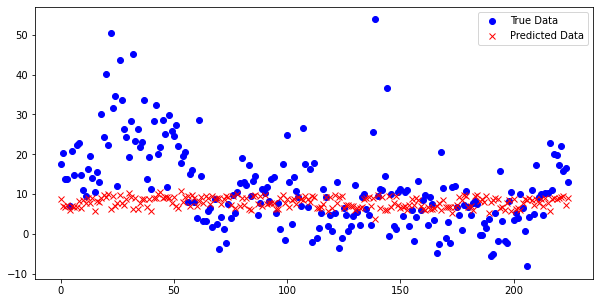

In [366]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_test['CvdVax_DisparityY'], "o", label="True Data",color='b')
ax.plot(ypred, "x", label="Predicted Data",color='r')
ax.legend(loc="best")
plt.show()

In [367]:
RMSE = 0
for item in df_test['CvdVax_DisparityY']-ypred:
    RMSE+=item**2
print((RMSE**0.5)/225)

0.7369954409866905


In [419]:
mod2 = sm.OLS(df_train['CvdVax_DisparityY'], df_train.loc[:, df_train.columns != 'CvdVax_DisparityY'])
res2 = mod2.fit_regularized(alpha=0.3,L1_wt=0.6)
print(res2.params)

const                   2.067882
IT_WholeRate            3.619663
HighSchool_WholeRate    2.336109
MedianInc_WholeAvg      0.000000
republican_rate         0.000000
Segregation             4.582625
urban                   1.213324
racial_weighted_bias    0.000000
hesitancy               0.000000
HighSchool_Disparity    2.069922
IT_Disparity            0.000000
MedianInc_Disparity     1.969714
vehicle                 0.000000
FacNumRate              0.000000
CaseRate                1.079761
Black_Prop              0.000000
State_Illinois          5.419434
State_Indiana           2.157587
State_Maine             0.000000
State_New Jersey        0.829277
State_New York          0.840749
State_North Carolina   -1.036143
State_Ohio              0.000000
State_Oregon            0.000000
State_Pennsylvania      0.000000
State_South Carolina   -0.444115
State_Tennessee        -1.402160
State_Texas            -0.593897
State_Virginia         -2.249032
State_West Virginia     0.000000
State_Wisc

In [420]:
ypred = res2.predict(df_test)

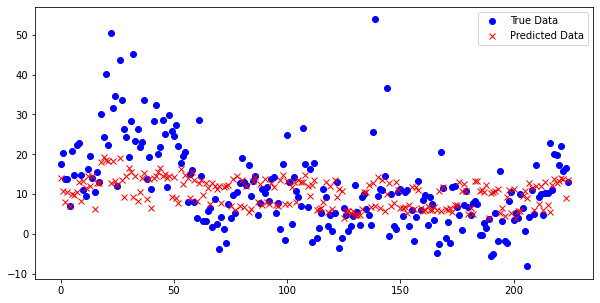

In [421]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_test['CvdVax_DisparityY'], "o", label="True Data",color='b')
ax.plot(ypred, "x", label="Predicted Data",color='r')
ax.legend(loc="best")
plt.show()

In [422]:
RMSE = 0
for item in df_test['CvdVax_DisparityY']-ypred:
    RMSE+=item**2
print((RMSE**0.5)/225)

0.6351454988830312
